# 코랩 matplotlib 한글 설정

https://mydevjourney.tistory.com/m/12

### 폰트 설치하기

In [ ]:
!apt-get -qq install fonts-nanum
₩

### 설치된 폰트 목록 구하기

In [ ]:
import matplotlib.font_manager as fm
import pathlib
for ttf in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    name = pathlib.Path(ttf).name
    if 'Nanum' in name:
        print(ttf)
        font_path = ttf
        font_name = fm.FontProperties(fname=font_path).get_name()
        print(font_name)
else:
    font_path = None
    font_name = None
#

/usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumSquare
/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf
NanumGothicCoding
/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumMyeongjo
/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumSquareRound
/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumGothic
/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
NanumGothicCoding
/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumSquareRound
/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumMyeongjo
/usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumSquare
/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumBarunGothic
/usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumGothic
/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumBarunGothic


### 폰트 목록에 추가하기

In [ ]:
import matplotlib.font_manager as fm

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
#

# 꺾은선 그래프 그리기

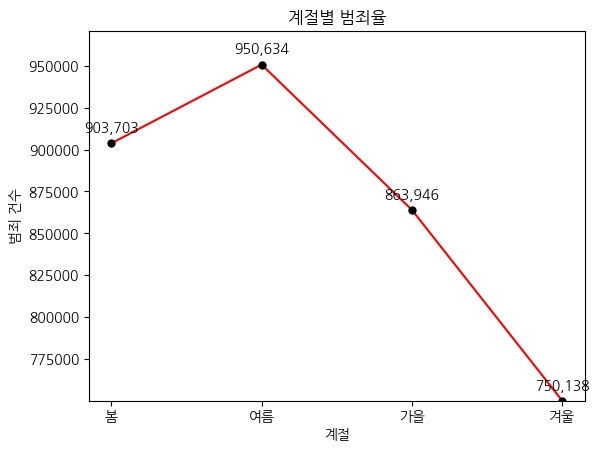

In [35]:
# 메모리에 CSV 파일 만들기
from io import BytesIO, SEEK_SET
seasoncrime_csv = BytesIO()
seasoncrime_csv.write(
b'\xb0\xe8\xc0\xfd,\xb9\xfc\xc1\xcb\xc0\xb2\r\n'
b'\xba\xbd,"903,703"\r\n'
b'\xbf\xa9\xb8\xa7,"950,634"\r\n'
b'\xb0\xa1\xc0\xbb,"863,946"\r\n'
b'\xb0\xdc\xbf\xef,"750,138"\r\n')
seasoncrime_csv.seek(0, SEEK_SET)

# 임포트
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# 한글 글꼴 설정
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams.update(
    {'font.size': 10,
     'font.family': 'NanumGothic'}) # 폰트 설정

# CSV 파일 읽기
# csv_file = 'seasoncrime.csv'
csv_file=seasoncrime_csv
df = pd.read_csv(csv_file,
                 thousands=',',
                 encoding='cp949')

#### 그래프 그리기
plt.plot(df['계절'], df['범죄율'],
    color='red', linestyle='-',
    marker='o',
    mfc='black', # 마커 채우기 색
    mec='black', # 마커 가장자리 색
    ms=5 # 마커 크기
)

# 마커 위에 숫자 표시
for i in range(4):
    plt.text(
        df['계절'][i],
        df['범죄율'][i] + 5000,
        '{:,}'.format(df['범죄율'][i]),
        ha = 'center',
        va = 'bottom')

# 최대값 표시할 공간 확보
plt.ylim(min(df['범죄율']), max(df['범죄율'])+20000)

plt.title('계절별 범죄율')
plt.xlabel('계절')
plt.ylabel('범죄 건수')
plt.show()

#